## Automatic Feature Selection

In [1]:
# All the three methods discussed here are for supervised learning algorithm so they need a target for fitting. This means we need to
# split the data set into training and test sets and fit the feature selection only on the training part of the data.

# Automatic Feature Selection helps us to retain those feature which are the best for our model results. Instead of increasing the number
# of features theey decrease it to optimal features using three different strategies

### Univariate Statistics

In [2]:
# Computing statistically significant relationship between feature and the target.
# Features with highest confidence are selected.
# In classification, this is knows as Analysis of Variance.
# Key Property of this tests are that they are univarite, meaning each feature is considered individually.
# A feature will be discarded if it is 'ONLY' informative when combined with other feature.

# These test are often fast to compute and do not require building the model. They are also ccompletely independent of the model that 
# you might want to apply after the feature selection

In [3]:
# To use univariate selection in scikit learn, you need to choose a test.

# Classification - f_classif (default), Regression - f_regression and a method to discard the features based on the p-values determined
# in the test.

# All methods for discarding the parameters use a threshold to discard all features with too high p-values(which mean they are unlikely
# to be related to the target)

# These methods differ in how they compute this threshold, with the simplest being SelectKBest, which selects fixed number of K-features

# SelectPercentile which select a fixed percentage of features

In [4]:
# We are adding some non-informative noise in the cancer dataset. We will then apply the feature selection and we expect it to identify
# the features that are non-informative and remove them.

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
import numpy as np

cancer = load_breast_cancer()

# Getting Deterministic Random Numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

# Adding noise features to the data, First 30 features are from dataset and next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=0.5)

# Using f_classif (the default) and SelectPercentile to select 50% of the features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

# Tranforming the training set
X_train_selected = select.transform(X_train)

print("X_train shape: {}".format(X_train.shape))
print("X_train_selected shape: {}".format(X_train_selected.shape))

X_train shape: (284, 80)
X_train_selected shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample Index')

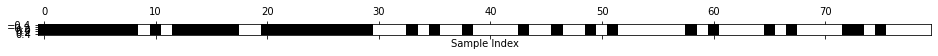

In [6]:
# As you can see the number of features were reduced from 80 to 40 which is by 50%. To get the features that have been selected we use
# get_support method, which returns a Boolean Mask of the selected Features.

mask = select.get_support()
print(mask)

# Visualizing the mask -- Black is True and White is False
import matplotlib.pyplot as plt

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample Index")

In [7]:
# As you can see most of the original features were retained and the noise features were removed but not all the original features were
# retained. 

# Now we will compare the performance of Logisitic Regression on all the features against the selected features.

from sklearn.linear_model import LogisticRegression

# Transforming the test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print("Score with selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Score with all features: 0.916
Score with selected features: 0.919


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [8]:
# As you can see the score with only the selected features is higher than the one with all the features. Hence it was able to remove the 
# noise but during this procedure it also removed some of the original features.

# UniVariate feature selection can still be very helpful if there is such a large number of features that building a model on them is 
# infeasible or if you suspect that many features are completely uninformative.